<center><h1>Assignment-1 : Problem Statement 17 (Financial Sentiment Analysis)</center></h1>



<h3>Problem Statement</h3>

Link to the Dataset: 
The following data is intended for advancing financial sentiment analysis research <br>
https://drive.google.com/file/d/15Wmi3GyCeEX6w8N528S40OYCnRhInH5W/view?usp=sharing 

<h4>Description of Data:</h4>

The data set is intended for advancing financial sentiment analysis research <br>
1.	Download the dataset and Create a dataframe named as fsa, then check the head, info, and describe methods on created dataframe fsa.(1 Mark)<br>
2.	Perform pre-processing steps like Removing Punctuations, Numbers, Special Characters, Stop Words in dataset.  (1 Mark)<br>
3.	Normalize Sentence column by using Stemming or Lemmatization. (1 Mark)<br>
4.	Preprocessed sentence should be included in fsa data frame as ‘cleaned_sentence’. Plot word cloud for sentence. (1 Mark)<br>
5.	Create two objects X & Y. X will be ‘cleaned_sentence' column of fsa data frame & Y will be ' Sentiment' column. ( 5 Marks)<br>
&emsp;1.	Create a Skip-gram object and split the data into training and testing sets. Train a Decision tree model. Display the confusion Matrix for both train and test.<br>
&emsp;2.	Create a CBoW object and split the data into training and testing sets. Train a Decision tree model. Display the confusion Matrix for both train and test.<br>
&emsp;3.	Compare Skip-gram and CBow. Answer without justification will not be awarded marks.<br>
6. Display the HMM POS tagging on the first row of ‘cleaned_Review’. ( 1 Mark)<br>


## Group No : 62

## Group Member Names: --> [Contribution]

Soumyadipta Maiti (2021sc04237@wilp.bits-pilani.ac.in) --> [100 %]

# Table of Contents

1. [Data Acquisition](#1.-Data-Acquisition)
2. [Text Pre-Processing](#2.-Text-Pre-Processing)
3. [Normalization of Sentence Columns](#3-Normalization-of-Sentence-Column)
4. [Updating DataFrame after Pre-processing](#4-Updation-of-DataFrame-after-Pre-processing)
5. [Spliting of DataFrame into Independent & target Variables](#5-Spliting-of-DataFrame-into-Independent-&-target-Variables)
6. [Displaying HMM POS tagging on 1st row of ‘cleaned_Review’](#6-Display-HMM-POS-tagging-on-first-row-of-‘cleaned_Review’)

<h1>1. Data Acquisition</h1>

### 1.1 Import Required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings
warnings.filterwarnings(action = 'ignore')

#for Text Pre-Processing
import nltk, string, re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

#for Stemming & lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import spacy
nlp = spacy.load("en_core_web_sm")
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

#for plotting of WordCloud
from wordcloud import WordCloud, STOPWORDS

#for Word Embedding
import gensim
from gensim.models import Word2Vec

# for Classification Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix    

# for POS Tagging
from nltk.corpus import brown

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\0394D9744\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\0394D9744\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


TypeError: issubclass() arg 1 must be a class

### 1.2 Download of Dataset

In [2]:
def download(url, output_file):
    
    response = requests.get(url, stream=True)

    if response.status_code == 200:
        with open(output_file, 'wb') as file:
            file.write(response.content)
        print("File downloaded successfully.")
    else:
        print("Failed to download the file.")

[Links to an external site.](https://drive.google.com/file/d/15Wmi3GyCeEX6w8N528S40OYCnRhInH5W/view)

To download a file from Google Drive link, we need to modify the URL to obtain direct download link as provided below: 


In [3]:
# url_fsa = 'https://drive.google.com/file/d/15Wmi3GyCeEX6w8N528S40OYCnRhInH5W/view'
url_fsa = 'https://drive.google.com/uc?id=15Wmi3GyCeEX6w8N528S40OYCnRhInH5W&export=download'

download(url=url_fsa, output_file='FinancialSentimentAnalysis.csv')

File downloaded successfully.


### 1.3 Creation of DataFrame

In [4]:
fsa = pd.read_csv('FinancialSentimentAnalysis.csv')

<h4>Reading of CSV File directly from URL</h4>

In [5]:
fsa = pd.read_csv(filepath_or_buffer=url_fsa)

In [6]:
fsa.iloc[1:10]

,Sentence,Sentiment
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


## 1.4 Checking of Head, Info & Describe method of DataFrame

In [7]:
fsa.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [8]:
fsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [9]:
fsa.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


<h1>2. Text Pre-Processing</h1>

Removing Punctuations, Numbers, and Special Characters, Stop Words in dataset

In [10]:
fsa_sentence = fsa.iloc[:,0]

 <h4>Word Tokenizer</h4>

In [11]:
def Word_Tokenizer(sentence):
    words = word_tokenize(sentence)
    return words

<h4>Removal of Punctuations from Words</h4>

In [12]:
def Remove_Punctuation(words):
    words_wo_punc = [w for w in words if w not in string.punctuation]
    return words_wo_punc

<h4>Removal of Stop Words</h4>

In [13]:
def Remove_StopWords(words):
    english_stop_words = set(stopwords.words('english'))
    words_wo_stopwords = [w for w in words if w not in english_stop_words]
    return words_wo_stopwords

<h4>Text Pre-Processing & comparision with a example</h4>

In [14]:
def Text_Preprocessing(sentences):
    sent_lower = sentences.lower()
    words_sent = Word_Tokenizer(sent_lower)
    words_wo_punc = Remove_Punctuation(words_sent)
    words_wo_punc_stopwrd = Remove_StopWords(words_wo_punc)
    return words_wo_punc_stopwrd

In [15]:
print(f'Original 1st Sentence from dataSet : \n\n{fsa_sentence[0]}')

Original 1st Sentence from dataSet : 

The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .


In [16]:
print(f'Processed Version of above Sentence : \n\n{Text_Preprocessing(fsa_sentence[0])}')

Processed Version of above Sentence : 

['geosolutions', 'technology', 'leverage', 'benefon', "'s", 'gps', 'solutions', 'providing', 'location', 'based', 'search', 'technology', 'communities', 'platform', 'location', 'relevant', 'multimedia', 'content', 'new', 'powerful', 'commercial', 'model']


<h1>3 Normalization of Sentence Column</h1> 

Lemmatization is preferred for Sentiment analysis as context meaning is considered in Lemmatization wrt Stemming

## 3.1 Stemming

In [17]:
def Stemming(words):
    porter_stemmer = PorterStemmer()
    words_stemmed = porter_stemmer.stem(token)
    return words_stemmed

## 3.2 Lemmatization

Lemmatization via Spacy is returning better result than WordNet Lemmatizer in our DataSet. So using Spacy's in-built Lemmatizer

In [18]:
def get_wordnet_POS(word):
    tag_dict = {'NOUN': 'n',
            'VERB': 'v',
            'ADJ': 'a',
            'ADV': 'r'}
    word_pos = nltk.pos_tag(tokens=['Cat'],tagset='universal')
    pos_word = tag_dict.get(word_pos[0][1])
    return pos_word

In [19]:
def Lemmatization_WordNet(words):
    word_token = []
    wordnet_lemmatizer = WordNetLemmatizer()

    for word in words:
        pos_word = get_wordnet_POS(word)
        pos_1 = wordnet_lemmatizer.lemmatize(word, pos=pos_word)
        word_token.append(pos_1)
    return word_token

In [20]:
def Lemmatization_spacy(sent):
    doc = nlp(sent)
    sent_lemma = ''
    for token in doc:
        sent_lemma = sent_lemma + token.lemma_ + ' '
    return sent_lemma

In [21]:
print(f'Original 1st Sentence from dataSet : \n\n{fsa_sentence[0]}')
print(f'\n\nLemmatized Version of Above Sentence : \n\n{Lemmatization_spacy(fsa_sentence[0])}')

Original 1st Sentence from dataSet : 

The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .


Lemmatized Version of Above Sentence : 

the GeoSolutions technology will leverage Benefon 's gps solution by provide Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model . 


<h1>4 Updation of DataFrame after Pre-processing</h1>

## 4.1 Preprocessed sentence should be included in fsa data frame as ‘cleaned_sentence’.

Preprocessing of Sentence is performed by following sequences: <br> 
- Text_Preprocessing:
  - Lowercase Conversion
  - Word Tokenization
  - Removal of Punctuations
  - Removal of StopWords
  
- Spacy Lemmatization

In [22]:
fsa_sentence = fsa.iloc[:,0]
fsa_cleaned = []

for sentence in fsa_sentence:
    sent_pre = Text_Preprocessing(sentence)
#     sent_lemma = Lemmatization_WordNetn(sent_pre)
#     sent_lemma = ' '.join(sent_lemma)
    
    sent_spacy = ''
    for word in sent_pre:
        sent_spacy = sent_spacy + word + ' '
    sent_lemma = Lemmatization_spacy(sent_spacy)
    
    fsa_cleaned.append(sent_lemma)
    
fsa['cleaned_sentence'] = fsa_cleaned

In [23]:
fsa[1:5]

,Sentence,Sentiment,cleaned_sentence
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi lows 1.50 2.50 bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter 2010 componenta 's net sale doubl...
3,According to the Finnish-Russian Chamber of Co...,neutral,accord finnish - russian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sell remain 22.4 percent s...


## 4.2 Plotting of Word Cloud for Sentence

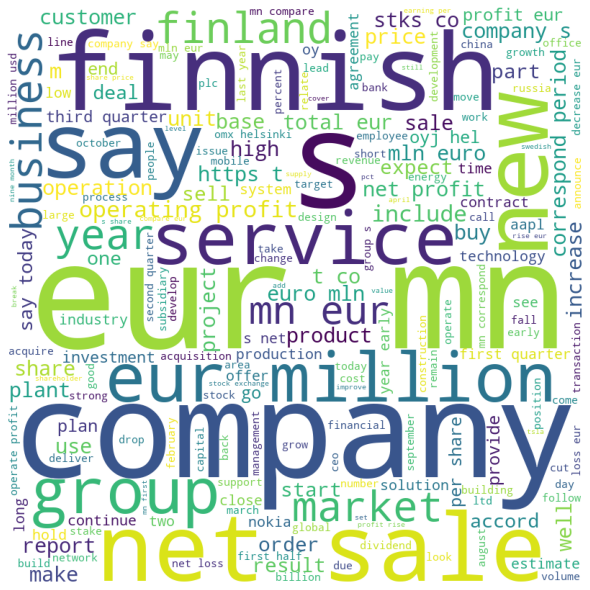

In [24]:
stop_words = set(STOPWORDS)
all_words = ''

for sentence in fsa.iloc[:,2]:
    words = sentence.split()
    all_words += ' '.join(words)+' '
    
word_cloud = WordCloud(width=800, height=800, background_color='white', 
                      stopwords=stop_words, min_font_size=10).generate(all_words)

# Plot WordCloud Image
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<h1>5 Spliting of DataFrame into Independent & target Variables</h1>

Create two objects Xand Y. X will be the ‘cleaned_sentence' column of fsa data frame and Y will be the ' Sentiment' column. 

In [25]:
# Independent Variable
X = fsa['cleaned_sentence']

In [26]:
# Dependent/Target Variable
Y = fsa['Sentiment']

In [27]:
print(f'Shape of X and Y are {X.shape} & {Y.shape}')

Shape of X and Y are (5842,) & (5842,)


<h4>Data Split into Training & Testing Sets</h4>

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #stratify=Y

In [29]:
print(f'Shape of X_train, X_test, Y_train, Y_test are : {X_train.shape}, {X_test.shape}, {Y_train.shape} & {Y_test.shape}')

Shape of X_train, X_test, Y_train, Y_test are : (4673,), (1169,), (4673,) & (1169,)


In [30]:
X_train.iloc[0:5]

1647    floor area yliopistonrinne project 7,900 sq 85...
1669              compensation news opinion distribution 
3159              rt acinvestorblog aapl still track 500 
4577    include eur 39.5 mn change fair value investme...
4221                                       gte long 7.44 
Name: cleaned_sentence, dtype: object

In [31]:
Y_train.iloc[0:5]

1647     neutral
1669     neutral
3159    positive
4577     neutral
4221    positive
Name: Sentiment, dtype: object

# Modelling

<h4>Training of Word2Vec on Training DataSet</h4>

In [32]:
# Conversion from text to Word2Vec embedding

def text_to_embedding(w2v_models, text):
    import numpy as np
    embedding = []
    for word in text:
        if word in w2v_models.wv.key_to_index:
            embedding.append(w2v_models.wv[word])
            
    return np.mean(embedding, axis=0) if embedding else np.zeros(vector_size_w2v)

In [33]:
def word2vector_training(X_train, X_test, vector_size_w2v = 100, windows = 5, sg_type = 0):
    
    # Convert list of sentences into tokenized texts 
    train_sentences = X_train.tolist()
    train_sentences = [token.split() for token in train_sentences]
    
    test_sentences = X_test.tolist()
    test_sentences = [token.split() for token in test_sentences]

    #Creation of Word2Vec Model
    w2v_model = Word2Vec(sentences=train_sentences + test_sentences, vector_size=vector_size_w2v,
                         window=windows, min_count=1, workers=5, sg=sg_type) # 0=CBOW, 1=Skip-gram
    
    #Training of Word2Vec Model
    w2v_model.train(corpus_iterable=train_sentences, total_examples=len(train_sentences), epochs=10)  #, alpha=0.03, min_alpha=0.0007

    # Convert training & testing data to Word2Vec embedding
    X_train_embed = [text_to_embedding(w2v_model, sent) for sent in X_train]
    X_test_embed = [text_to_embedding(w2v_model, sent) for sent in X_test]

    return X_train_embed, X_test_embed

<h4>Function for Evaluation of Sentiment Classification</h4>

In [34]:
def metrics_classification(y_test, y_test_predict):
    
    # Calculate Accuracy of model
    acrcy_model = accuracy_score(y_test, y_test_predict)
    print("Accuracy:", acrcy_model)

    # Calculate & Plot Confusion Matrix of model
    conf_mrtx = confusion_matrix(y_true=y_test, y_pred=y_test_predict)
    print('\n\nConfusion Matrix \n')
    print(conf_mrtx)
    
    plt.figure(figsize=(10,5))
    sns.heatmap(conf_mrtx, annot=True)
    plt.show()
    
    # Calculate Classification Report of model
    clf_mtrx = classification_report(y_true=y_test, y_pred=y_test_predict)
    print('\n\nClassification Report \n')
    print(clf_mtrx)
    
    return acrcy_model, conf_mrtx, clf_mtrx

<h4>Function for Decision Tree Classification</h4>

In [35]:
def decision_tree_Classification(X_train_embed, Y_train, X_test_embed, Y_test):    
    classifier_decisiontree = DecisionTreeClassifier(max_depth=10, min_samples_split=5, criterion='gini')
    classifier_decisiontree.fit(X_train_embed, Y_train)
    y_test_predict = classifier_decisiontree.predict(X=X_test_embed)
    
    return y_test_predict

## 5.1 Modelling using Skip-gram:

[Create a Skip-gram object](#Skip-gram-Object-Creation-&-Vector-Embedding) and split the data into training and testing sets. Train a Decision tree model. Display the confusion Matrix for both train and test.

<h4>Skip-gram Object Creation & Vector Embedding</h4>

In [36]:
# for Skip-gram, sg = 1
X_train_embed_sg, X_test_embed_sg = word2vector_training(X_train, X_test, vector_size_w2v = 300, 
                                                               windows = 5, sg_type = 1)

In [37]:
X_train_embed_sg[0]

array([ 5.15078194e-02,  1.86314628e-01, -3.79441842e-03,  4.95794900e-02,
       -2.82226112e-02, -1.92563444e-01,  1.39913201e-01,  3.34467411e-01,
        8.82512145e-03, -4.09501418e-02,  4.10103761e-02, -1.01038568e-01,
       -7.18344972e-02,  3.56163830e-02, -7.51968771e-02, -1.08485468e-01,
        1.54046580e-01, -3.30010466e-02,  6.52360469e-02, -7.62448609e-02,
       -1.29435956e-01,  4.02098941e-03,  3.98448259e-02,  6.14098310e-02,
        1.23292357e-01,  1.60345659e-02, -1.58525065e-01, -7.51572773e-02,
       -9.54679623e-02, -1.38690114e-01,  6.99993819e-02, -1.05229422e-01,
        8.11873190e-03, -7.61336740e-03, -7.43927732e-02,  9.34470594e-02,
        3.76002267e-02, -1.44933686e-01, -1.06912330e-02, -2.68671922e-02,
       -3.17153968e-02, -4.37441207e-02, -4.56074141e-02, -9.58748087e-02,
        7.64570534e-02,  1.19381070e-01,  9.91755724e-02,  1.06954053e-01,
       -7.13967681e-02,  1.32822484e-01,  1.76489502e-02,  5.75131662e-02,
       -1.17360957e-01,  

### 5.1.1 Decision Tree Model

#### Training & Prediction using Logistic Regression

In [38]:
y_train_predict_sg_dt = decision_tree_Classification(X_train_embed_sg, Y_train, X_train_embed_sg, Y_train)

#### Evaluation Metrics for Training Set

Accuracy: 0.7175262144232827


Confusion Matrix 

[[ 202  377  106]
 [  43 2241  224]
 [  15  555  910]]


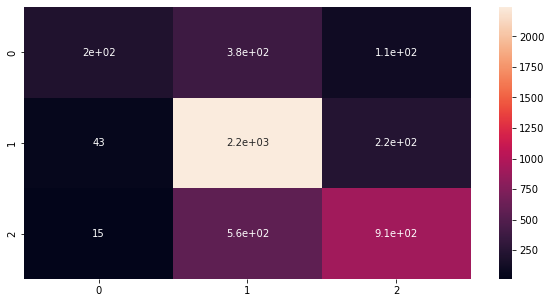



Classification Report 

              precision    recall  f1-score   support

    negative       0.78      0.29      0.43       685
     neutral       0.71      0.89      0.79      2508
    positive       0.73      0.61      0.67      1480

    accuracy                           0.72      4673
   macro avg       0.74      0.60      0.63      4673
weighted avg       0.73      0.72      0.70      4673



In [39]:
acrc_sg_dt_trn, conf_mrtx_sg_dt_trn, clf_mtrx_sg_dt_trn = metrics_classification(Y_train, y_train_predict_sg_dt)

#### Evaluation Metrics for Testing Set

In [40]:
y_test_predict_sg_dt = decision_tree_Classification(X_train_embed_sg, Y_train, X_test_embed_sg, Y_test)

Accuracy: 0.5175363558597091


Confusion Matrix 

[[ 15 113  47]
 [ 33 464 125]
 [ 33 213 126]]


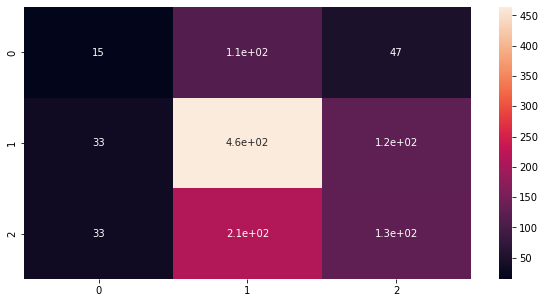



Classification Report 

              precision    recall  f1-score   support

    negative       0.19      0.09      0.12       175
     neutral       0.59      0.75      0.66       622
    positive       0.42      0.34      0.38       372

    accuracy                           0.52      1169
   macro avg       0.40      0.39      0.38      1169
weighted avg       0.47      0.52      0.49      1169



In [41]:
acrc_sg_dt_tst, conf_mrtx_sg_dt_tst, clf_mtrx_sg_dt_tst = metrics_classification(Y_test, y_test_predict_sg_dt)

## 5.2 Modelling using CBoW:

[Create a CBoW object](#CBoW-Object-Creation-&-Vector-Embedding) and split the data into training and testing sets. Train a Decision tree model. Display the confusion Matrix for both train and test.

<h4>CBoW Object Creation & Vector Embedding</h4>

In [42]:
# for CBoW, sg = 0
X_train_embed_cbow, X_test_embed_cbow = word2vector_training(X_train, X_test, vector_size_w2v = 300, 
                                                                   windows = 5, sg_type = 0)

### 5.2.1 Decision Tree Model

#### Training & Prediction using Decision Tree

In [43]:
y_train_predict_cbow_dt = decision_tree_Classification(X_train_embed_cbow, Y_train, X_train_embed_cbow, Y_train)

#### Evaluation Metrics for Training Set

Accuracy: 0.6843569441472288


Confusion Matrix 

[[ 179  457   49]
 [  38 2353  117]
 [   6  808  666]]


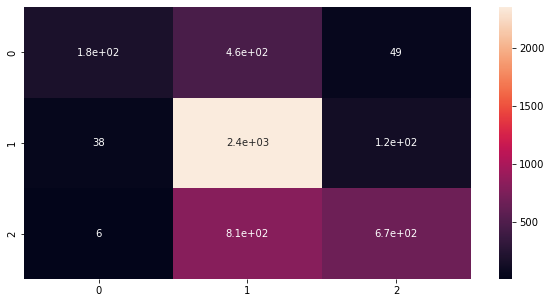



Classification Report 

              precision    recall  f1-score   support

    negative       0.80      0.26      0.39       685
     neutral       0.65      0.94      0.77      2508
    positive       0.80      0.45      0.58      1480

    accuracy                           0.68      4673
   macro avg       0.75      0.55      0.58      4673
weighted avg       0.72      0.68      0.65      4673



In [44]:
acrc_cbow_dt_trn, conf_mrtx_cbow_dt_trn, clf_mtrx_cbow_dt_trn = metrics_classification(Y_train, y_train_predict_cbow_dt )

#### Evaluation Metrics for Testing Set

In [45]:
y_test_predict_cbow_dt = decision_tree_Classification(X_train_embed_cbow, Y_train, X_test_embed_cbow, Y_test)

Accuracy: 0.5620188195038495


Confusion Matrix 

[[ 14 123  38]
 [ 22 524  76]
 [ 26 227 119]]


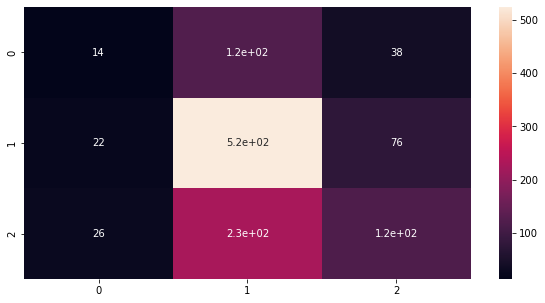



Classification Report 

              precision    recall  f1-score   support

    negative       0.23      0.08      0.12       175
     neutral       0.60      0.84      0.70       622
    positive       0.51      0.32      0.39       372

    accuracy                           0.56      1169
   macro avg       0.45      0.41      0.40      1169
weighted avg       0.52      0.56      0.52      1169



In [46]:
acrc_cbow_dt_tst, conf_mrtx_cbow_dt_tst, clf_mtrx_cbow_dt_tst = metrics_classification(Y_test, y_test_predict_cbow_dt)

## 5.3 Comparison between Skip-gram & CBoW

In [47]:
def plot_matrix_comparison(matrix1, matrix2, vector_model1, vector_model2, dataset):

    # Extract the values from the matrices
    values1 = matrix1.flatten()
    values2 = matrix2.flatten()

    # Create x-axis labels
    labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

    # Plot the lines for matrix1 and matrix2
    plt.plot(labels, values1, label=f'{vector_model1} {dataset}', marker='o')
    plt.plot(labels, values2, label=f'{vector_model2} {dataset}', marker='o')

    # Set plot title and labels
    plt.title('Comparison of Confusion Matrix')
    plt.xlabel('Elements')
    plt.ylabel('Values')

    # Add a legend
    plt.legend()

    # Display the plot
    plt.show()

Comparison of Confusion Matrix of Decision Tree Model for Skip-Gram vs CBoW Word-Embedding of Training DataSet

In [48]:
conf_mrtx_sg_dt_trn

array([[ 202,  377,  106],
       [  43, 2241,  224],
       [  15,  555,  910]], dtype=int64)

In [49]:
conf_mrtx_sg_dt_trn.flatten()

array([ 202,  377,  106,   43, 2241,  224,   15,  555,  910], dtype=int64)

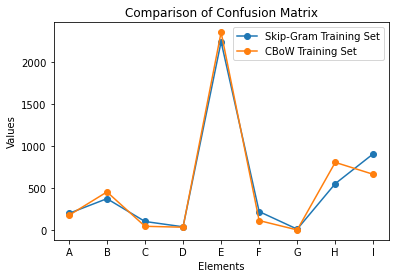

In [50]:
plot_matrix_comparison(matrix1=conf_mrtx_sg_dt_trn, matrix2=conf_mrtx_cbow_dt_trn, 
                       vector_model1='Skip-Gram', vector_model2='CBoW', dataset='Training Set')

Comparison of Confusion Matrix of Decision Tree Model for Skip-Gram vs CBoW Word-Embedding of Testing DataSet

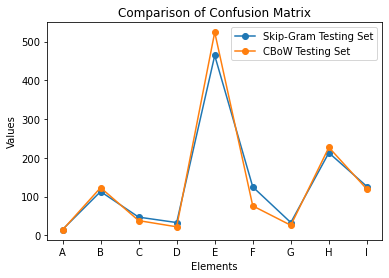

In [51]:
plot_matrix_comparison(matrix1=conf_mrtx_sg_dt_tst, matrix2=conf_mrtx_cbow_dt_tst, 
                       vector_model1='Skip-Gram', vector_model2='CBoW', dataset='Testing Set')

Comparison of Accuracy of Decision Tree Model for Skip-Gram vs CBoW Word-Embedding of Testing DataSet

In [52]:
if acrc_sg_dt_tst > acrc_cbow_dt_tst:
    print(f'Skip-Gram is better as Accuracy of Testing Set for Skip-Gram & CBoW are {acrc_sg_dt_tst}, {acrc_cbow_dt_tst} ')
else:
    print(f'CBoW is better as Accuracy of Testing Set for Skip-Gram & CBoW are {acrc_sg_dt_tst}, {acrc_cbow_dt_tst} ')

CBoW is better as Accuracy of Testing Set for Skip-Gram & CBoW are 0.5175363558597091, 0.5620188195038495 


From Confusion Matrix & Classification Report, It seems like Skip-Gram is better than CBoW Word-Embedding for Testing DataSet.

In general, Skip-gram might be a better choice if: 
- Dataset is small
- More specific semantic relationships between words are needed to capture.

On the other hand, CBoW could be more suitable if :<br>
- dataset is large  
- More Focus on capturing overall context of words.


However, it's worth noting that performance of Skip-gram & CBoW can vary depending on specific task & dataset. 
It's recommended to experiment with both architectures & evaluate their performance based on particular application and data.

<h4>So, We would recommend CBoW Word-Embedding over Skip-Gram as:</h4><br>
- Our dataset is large (around 6K) <br>
- More Focus on capturing overall context of words (Sentiment Analysis for whole Sentence).

Although Sentiment Analsysis for Financial Statement is performed via __Decision Tree__(as restricted in problem statement), below are best suited recommended models
for same:

__Recurrent Neural Networks (RNNs)__: RNNs, specifically Long Short-Term Memory (LSTM) networks, are effective for sequence modeling tasks like sentiment analysis. They can capture contextual information and dependencies in text, making them suitable for understanding sentiment in longer sentences or documents.

__Transformer-based Models__: Transformer models, such as BERT (Bidirectional Encoder Representations from Transformers), have achieved state-of-the-art results in many natural language processing tasks, including sentiment analysis. These models leverage self-attention mechanisms to capture global dependencies and contextual information effectively.

    

<h1>6 Display HMM POS tagging on first row of ‘cleaned_Review’</h1>

In [53]:
from nltk.tokenize import WhitespaceTokenizer

# Load Brown corpus once
brown_corpus = brown.tagged_sents(categories='news')

# Initialize tokenizer
tokenizer = WhitespaceTokenizer()

# Train Hidden Markov Model tagger
hmm_tagger = nltk.HiddenMarkovModelTagger.train(brown_corpus)

In [54]:
def pos_tag_hmm(sent):
    # Tokenize the input text
    tokens = tokenizer.tokenize(sent)

    # Perform bulk tagging
    tagged_tokens = hmm_tagger.tag_sents([tokens])[0]

    return tagged_tokens

<h4>Display of HMM POS tagging on first row of ‘cleaned_Review’</h4>

‘cleaned_sentence’ of First Row of Training Set

In [55]:
X_train.sort_index()
X_train_sort = X_train.sort_index()
first_sent_train = X_train_sort.iloc[0]

In [56]:
print(f'First Row of Training Set : \n\n{first_sent_train}\n\n')

# tagged_texts = hmm_tagging(first_sent_train)
tagged_texts = pos_tag_hmm(first_sent_train)
print(f'HMM POS Tagging of above Sentence: \n\n{tagged_texts}')

First Row of Training Set : 

geosolution technology leverage benefon 's gps solution provide location base search technology community platform location relevant multimedia content new powerful commercial model 


HMM POS Tagging of above Sentence: 

[('geosolution', 'NP-HL'), ('technology', ',-HL'), ('leverage', 'NP-HL'), ('benefon', ',-HL'), ("'s", 'NP-HL'), ('gps', ',-HL'), ('solution', 'NP-HL'), ('provide', ',-HL'), ('location', 'NP-HL'), ('base', ',-HL'), ('search', 'NP-HL'), ('technology', ',-HL'), ('community', 'NP-HL'), ('platform', ',-HL'), ('location', 'NP-HL'), ('relevant', ',-HL'), ('multimedia', 'NP-HL'), ('content', ',-HL'), ('new', 'NP-HL'), ('powerful', ',-HL'), ('commercial', 'NP-HL'), ('model', ',-HL')]


‘cleaned_sentence’ of First Row of Testing Set

In [57]:
X_test_sort = X_test.sort_index()
first_sent_test = X_test_sort.iloc[0]

In [58]:
print(f'First Row of Testing Set : \n\n{first_sent_test}\n\n')

# tagged_test_texts = hmm_tagging(first_sent_test)
tagged_test_texts = pos_tag_hmm(first_sent_test)
print(f'HMM POS Tagging of above Sentence: \n\n{tagged_test_texts}')

First Row of Testing Set : 

kone 's net sale rise 14 year - on - year first nine month 2008 


HMM POS Tagging of above Sentence: 

[('kone', 'AT'), ("'s", 'JJ'), ('net', 'NN'), ('sale', 'NN'), ('rise', 'IN'), ('14', 'CD'), ('year', 'NN'), ('-', 'NNS'), ('on', 'IN'), ('-', 'AT'), ('year', 'NN'), ('first', 'RB'), ('nine', 'CD'), ('month', 'NN'), ('2008', 'IN')]
